### Import the necessary libraries

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
%matplotlib notebook
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [2]:
train_data = pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/content/drive/My Drive/Titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analyzing features

**Pclass**

In [6]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Sex**

In [7]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Age**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


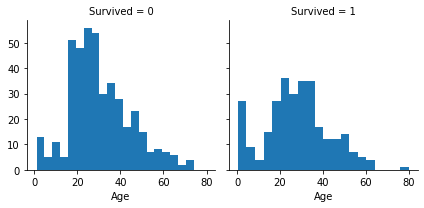

In [8]:
%matplotlib inline
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**SibSp**

In [9]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Parch**

In [10]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Embarked**

In [11]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Let us drop features like Name, Ticket and Cabin

In [12]:
train_data.drop(columns = ['Name','Ticket','Cabin'], inplace= True)
test_data.drop(columns = ['Name','Ticket','Cabin'], inplace= True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Data Preprocessing

In [13]:
train_data.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [14]:
test_data.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Pclass          0
PassengerId     0
dtype: int64

**Age**

Let us fill the missing values in Age with random numbers between (mean-std) and (mean+std)

In [15]:
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)

**Embarked**

Since only two values are missing in Embarked, let us replace it with the mode (value with the max occurrences)

In [16]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

**Fare**

Since only one value is missing in Fare, let us replace it with the median (middle value in a sorted list)

In [18]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

### Feature Engineering

**Age**

Let us create Age bands and determine correlations with Survived

In [19]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.521368
1,"(16.0, 32.0]",0.348214
2,"(32.0, 48.0]",0.382114
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands

In [20]:
data = [train_data, test_data]
for dataset in data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

train_data.drop(columns = ['AgeBand'], inplace= True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,1,0,7.2500,S
1,2,1,1,female,2,1,0,71.2833,C
2,3,1,3,female,1,0,0,7.9250,S
3,4,1,1,female,2,1,0,53.1000,S
4,5,0,3,male,2,0,0,8.0500,S


**Fare**

Similarly, let us create Fare bands and determine correlations with Survived

In [21]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Let us replace Fare with ordinals based on these bands

In [22]:
data = [train_data, test_data]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data.drop(columns = ['FareBand'], inplace= True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,1,0,0,S
1,2,1,1,female,2,1,0,3,C
2,3,1,3,female,1,0,0,1,S
3,4,1,1,female,2,1,0,3,S
4,5,0,3,male,2,0,0,1,S


**SibSp & Parch**

Let us create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [23]:
data = [train_data, test_data]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create yet another feature called IsAlone and drop Parch, SibSp, and FamilySize features in favor of IsAlone

In [24]:
data = [train_data, test_data]
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
train_data.drop(columns = ['Parch', 'SibSp', 'FamilySize'], inplace= True)
test_data.drop(columns = ['Parch', 'SibSp', 'FamilySize'], inplace= True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,male,1,0,S,0
1,2,1,1,female,2,3,C,0
2,3,1,3,female,1,1,S,1
3,4,1,1,female,2,3,S,0
4,5,0,3,male,2,1,S,1


### Converting categorical feature to numeric

In [26]:
# data = [train_data, test_data]
# for dataset in data:
#     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# train_data.head()

In [27]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Sex'], prefix='Sex')],axis=1)
train_data = pd.concat([train_data,pd.get_dummies(train_data['Embarked'], prefix='Embarked')],axis=1)
train_data = pd.concat([train_data,pd.get_dummies(train_data['Pclass'], prefix='Pclass')],axis=1)
train_data.drop(columns=['Sex', 'Embarked','Pclass'], inplace=True)

train_data.head()

,PassengerId,Survived,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,1,0,0,0,1,0,0,1,0,0,1
1,2,1,2,3,0,1,0,1,0,0,1,0,0
2,3,1,1,1,1,1,0,0,0,1,0,0,1
3,4,1,2,3,0,1,0,0,0,1,1,0,0
4,5,0,2,1,1,0,1,0,0,1,0,0,1


In [28]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Sex'], prefix='Sex')],axis=1)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'], prefix='Embarked')],axis=1)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Pclass'], prefix='Pclass')],axis=1)
test_data.drop(columns=['Sex', 'Embarked','Pclass'], inplace=True)

test_data.head()

,PassengerId,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,2,0,1,0,1,0,1,0,0,0,1
1,893,2,0,0,1,0,0,0,1,0,0,1
2,894,3,1,1,0,1,0,1,0,0,1,0
3,895,1,1,1,0,1,0,0,1,0,0,1
4,896,1,1,0,1,0,0,0,1,0,0,1


### Model Building

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Random Forrest



In [29]:
X_train = train_data.drop(columns = ['Survived','PassengerId'], inplace= False)
Y_train = train_data['Survived']
X_test = test_data.drop(columns = ['PassengerId'], inplace= False)

In [30]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)

# submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": Y_pred})
# submission.to_csv('logreg_submission.csv', index=False)

In [31]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": Y_pred})
# submission.to_csv('knn_submission.csv', index=False)

In [32]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

# submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": Y_pred})
# submission.to_csv('svc_submission.csv', index=False)

In [38]:
# Random Forest

random_forest = RandomForestClassifier(criterion = 'gini',
                                       max_depth = 15,
                                       min_samples_leaf = 1, 
                                       min_samples_split = 35,   
                                       n_estimators=800, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": Y_pred})
# submission.to_csv('random_forest_submission.csv', index=False)

In [34]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 3, 5, 10, 15], "min_samples_split" : [5, 8, 10, 15, 25, 35], 
#               "n_estimators": [100, 200, 400, 800], "max_depth" : [5, 7, 10, 15, 20, 25]}
# rf = RandomForestClassifier()
# clf = RandomizedSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.best_params_, clf.best_score_

In [39]:
# LGBM

lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)
Y_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, Y_train) * 100, 2)

In [40]:
# submission = pd.DataFrame({"PassengerId": test_data["PassengerId"],"Survived": Y_pred})
# submission.to_csv('lgbm_submission.csv', index=False)

In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','LGBM'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_random_forest, acc_lgbm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,LGBM,85.41
3,Random Forest,82.60
1,KNN,79.35
0,Support Vector Machines,78.79
2,Logistic Regression,78.00
